In [8]:

library(readr)
library(dplyr)
library(tidyr)

message = FALSE

#data <- read_csv("LSE01-Messreihe-1.csv")
# Reshape Data. Collapsing several columns into two:
#df <- pivot_longer(data,cols=2:31,names_to="Sensor",values_to="Messwert",values_drop_na = TRUE)

# Function to calculate standard score
fun <- function(filename,colnamex,colnamez){
    data <- read_csv(filename, show_col_types = FALSE)
    df <- pivot_longer(data,cols=2:31,names_to="Sensor",values_to="Messwert",values_drop_na = TRUE)
    # Drop Time Column
    df <- df %>% select(Sensor,Messwert)
    # Group Sensors with mean
    df <- df %>% group_by(Sensor) %>% summarise(val = mean(Messwert))
    # Calculate standard score (Normalisierung) 
    df[colnamez] <- scale(as.numeric(df$val))
    names(df)[2] <- colnamex
    return(df)
}

colnamex <- c("1","2","3","4","5","6","7","8","9","10","11")    
colnamez <- c("z1","z2","z3","z4","z5","z6","z7","z8","z9","z10","z11")
filename <- c("LSE01-Messreihe-1.csv",
              "LSE01-Messreihe-2.csv",
              "LSE01-Messreihe-3.csv",
              "LSE01-Messreihe-4.csv",
              "LSE01-Messreihe-5.csv",
              "LSE01-Messreihe-6.csv",
              "LSE01-Messreihe-7.csv",
              "LSE01-Messreihe-8.csv",
              "LSE01-Messreihe-9.csv",
              "LSE01-Messreihe-10.csv",
              "LSE01-Messreihe-11.csv") 



df <- fun(filename[1],colnamex[1],colnamez[1])

for (i in 2:length(colnamex)){
    tp <- fun(filename[i],colnamex[i],colnamez[i])
    df <- cbind(df, tp[2], tp[3])
}

# round to 3 digits
df <- df %>% mutate(across(2:ncol(df),round,3))
head(df,10)
 

,Sensor,1,z1,2,z2,3,z3,4,z4,5,⋯,7,z7,8,z8,9,z9,10,z10,11,z11
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LSE-01,2.287,-1.155,7.242,1.104,5.133,0.807,4.565,0.046,4.814,⋯,4.748,1.437,3.627,0.915,3.740,0.477,11.100,0.701,9.174,-0.662
2,LSE-02,2.983,-0.402,6.780,0.256,3.993,-0.880,3.992,-1.277,3.488,⋯,3.464,-0.560,3.197,-0.091,3.357,-0.396,8.878,-2.201,8.364,-1.616
3,LSE-03,2.777,-0.625,6.425,-0.395,4.600,0.018,4.427,-0.273,4.710,⋯,4.243,0.651,3.640,0.946,3.520,-0.024,10.283,-0.366,9.964,0.269
4,LSE-04,2.014,-1.450,6.108,-0.976,4.898,0.459,4.566,0.048,3.990,⋯,4.367,0.844,3.607,0.868,3.610,0.181,11.200,0.831,9.525,-0.248
5,LSE-05,2.832,-0.566,7.403,1.400,4.767,0.265,4.775,0.530,4.510,⋯,4.561,1.146,3.595,0.841,3.997,1.061,10.483,-0.105,8.034,-2.005
6,LSE-06,2.020,-1.444,6.504,-0.250,4.774,0.276,5.073,1.219,4.002,⋯,3.111,-1.109,3.488,0.591,3.330,-0.457,11.517,1.245,10.420,0.806
7,LSE-07,3.200,-0.167,7.197,1.021,4.914,0.482,4.720,0.403,4.750,⋯,4.541,1.115,3.660,0.993,3.628,0.221,10.629,0.085,10.700,1.136
8,LSE-08,2.944,-0.444,7.122,0.884,4.675,0.129,4.747,0.465,4.526,⋯,3.407,-0.649,3.401,0.388,3.600,0.158,11.100,0.701,9.374,-0.426
9,LSE-09,2.127,-1.328,6.560,-0.147,3.899,-1.020,4.765,0.507,5.232,⋯,3.961,0.213,3.197,-0.091,3.437,-0.214,11.200,0.831,9.468,-0.315


In [10]:
x <- df %>% select(Sensor,'1','2','3','4','5','6','7','8','9','10','11')
z <- df %>% select(Sensor,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11)

#write.csv(LSE01_x,"x",row.names = FALSE)
#write.csv(LSE01_z,"z",row.names = FALSE)

x_longer <- pivot_longer(x, cols=2:ncol(x), names_to ="Messreihe", values_to="val")
z_longer <- pivot_longer(z, cols=2:ncol(z), names_to ="Messreihe", values_to="val")

z$Median <- apply(z[,2:ncol(z)],1,median)

head(x,5)
head(z,5)

,Sensor,1,2,3,4,5,6,7,8,9,10,11
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LSE-01,2.287,7.242,5.133,4.565,4.814,3.967,4.748,3.627,3.740,11.100,9.174
2,LSE-02,2.983,6.780,3.993,3.992,3.488,3.670,3.464,3.197,3.357,8.878,8.364
3,LSE-03,2.777,6.425,4.600,4.427,4.710,4.527,4.243,3.640,3.520,10.283,9.964
4,LSE-04,2.014,6.108,4.898,4.566,3.990,3.614,4.367,3.607,3.610,11.200,9.525
5,LSE-05,2.832,7.403,4.767,4.775,4.510,4.450,4.561,3.595,3.997,10.483,8.034


,Sensor,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,Median
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LSE-01,-1.155,1.104,0.807,0.046,1.083,-0.161,1.437,0.915,0.477,0.701,-0.662,0.701
2,LSE-02,-0.402,0.256,-0.880,-1.277,-1.306,-0.811,-0.560,-0.091,-0.396,-2.201,-1.616,-0.811
3,LSE-03,-0.625,-0.395,0.018,-0.273,0.896,1.067,0.651,0.946,-0.024,-0.366,0.269,0.018
4,LSE-04,-1.450,-0.976,0.459,0.048,-0.401,-0.934,0.844,0.868,0.181,0.831,-0.248,0.048
5,LSE-05,-0.566,1.400,0.265,0.530,0.535,0.898,1.146,0.841,1.061,-0.105,-2.005,0.535


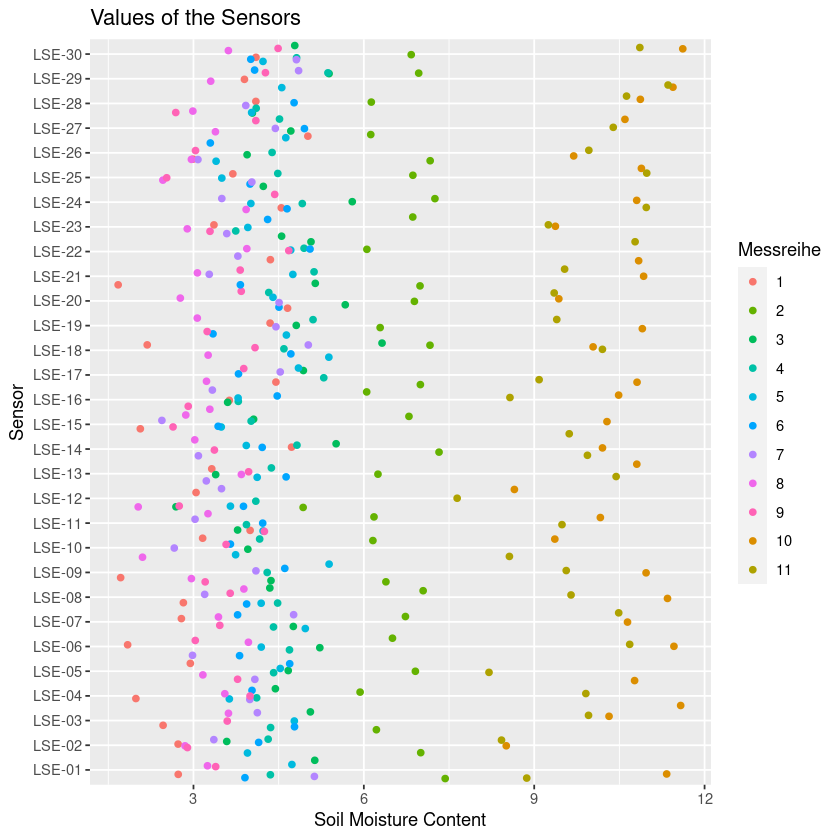

In [15]:
library(ggplot2)

p1 <- ggplot(x_longer, aes(x = val, y = Sensor, color = Messreihe)) 
  
p1 + geom_point(position=position_jitter(0.5)) +
  #theme_classic() +
  labs(title="Values of the Sensors", x = "Soil Moisture Content") +
  scale_color_discrete(breaks=colnamex)


# Idee für Plot: Mittelwert + Standardabweichung der Messreihen

#p2 <- ggplot(x, aes(x=Median, y=Sensor, Color =))


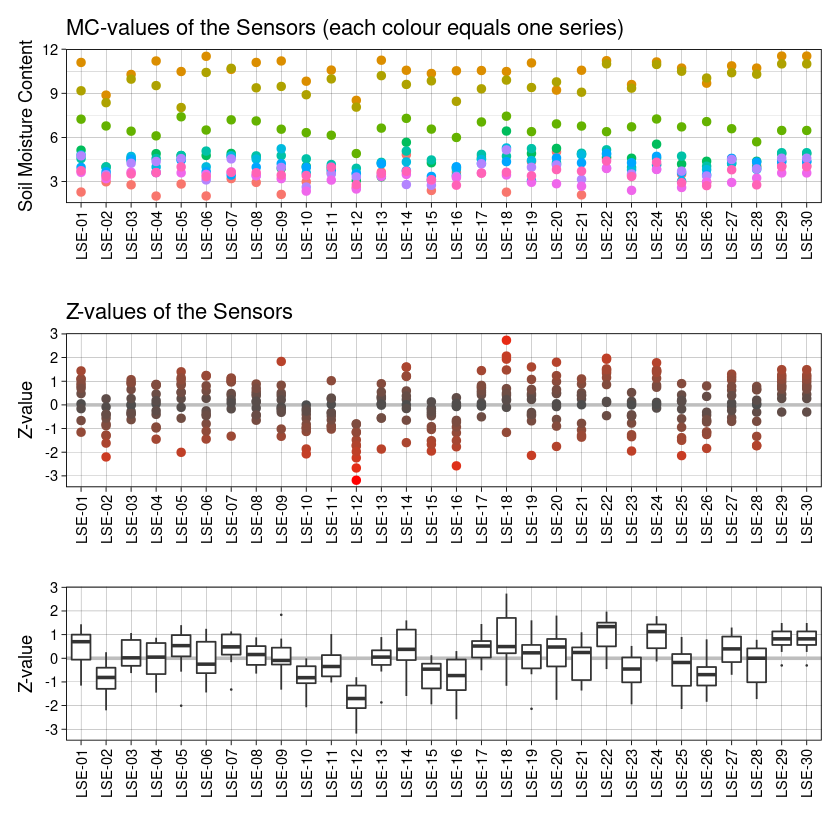

In [58]:
library(ggplot2)
library(patchwork)

p1 <- ggplot(x_longer, aes(x = Sensor, y = val, color = Messreihe))  +
  geom_point(size=2) +
  labs(title="MC-values of the Sensors", y = "Soil Moisture Content", x = "") +
  theme_linedraw() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
  theme(legend.position = 'none') +
  scale_color_discrete(breaks=colnamex)


zplot <- ggplot(z_longer, aes(x = Sensor, y = val, color = val)) +
  geom_hline(yintercept = 0, size=1, color = "grey") +
  geom_point(size=2) +
  theme_linedraw() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) +
  theme(panel.grid.minor.y = element_blank()) +
  theme(legend.position = "none") +
  labs(title="Z-values of the Sensors", y = "Z-value", x = "") +
  scale_color_gradient2(high = "red", mid = "gray30", low = "red") 

z_boxplot <- ggplot(z_longer, aes(x = Sensor, y = val)) +
  geom_hline(yintercept = 0, size=1, color = "grey") +
  geom_boxplot(outlier.size=0.1) +
  theme_linedraw() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) +
  theme(panel.grid.major.y = element_line()) + 
  theme(panel.grid.minor.y = element_blank()) +
  labs(y = "Z-value", x = "")

p1 / zplot / z_boxplot  #patchwork library